 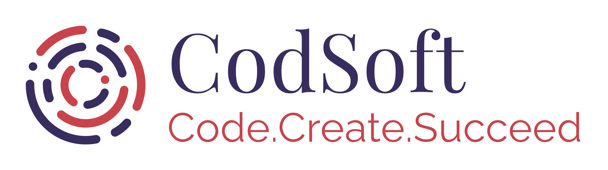

# **CodSoft - Data Science Internship**



## **`Author: Sai Charan Kanthuri Venkata`**
## **`Batch : SEPT BATCH A5`**
## **`Role: Data Science Intern`**
---



# **`Task 2 : Movie Rating Prediction With Python`**



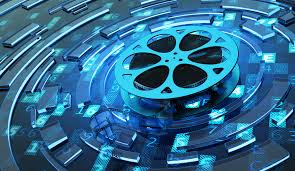

### 1. Import Required Modules and Data


In [1]:
#Importing Libraries
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager
import matplotlib.pyplot as plt ;
import pandas as pd
from wordcloud import WordCloud
import plotly.express as px

#Training model libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

### 2.Understanding Data

In [2]:
data=pd.read_csv('/content/IMDb Movies India.csv',encoding='latin')

In [3]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
data['Genre'].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [9]:
data['Year'].value_counts()

(2019)    410
(2021)    392
(2018)    381
(2017)    360
(2005)    346
         ... 
(1917)      1
(1913)      1
(1926)      1
(1914)      1
(1924)      1
Name: Year, Length: 102, dtype: int64

In [10]:
data['Director'].value_counts()

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: Director, Length: 5938, dtype: int64

In [11]:
data['Actor 1'].value_counts()

Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: Actor 1, Length: 4718, dtype: int64

In [12]:
data['Actor 2'].value_counts()

Rekha                 83
Hema Malini           72
Mithun Chakraborty    63
Dharmendra            61
Mala Sinha            48
                      ..
Paris Keswani          1
Shubhangi Latkar       1
Amit Ghosh             1
Ayushi Singh           1
Sarah Jane Dias        1
Name: Actor 2, Length: 4891, dtype: int64

In [13]:
data['Actor 3'].value_counts()

Pran             91
Shakti Kapoor    65
Anupam Kher      64
Jeevan           59
Prem Chopra      52
                 ..
Kayamali          1
Kirit Shah        1
Sanil Khosla      1
Anup Grover       1
Suparna Anand     1
Name: Actor 3, Length: 4820, dtype: int64

### 3. Data Cleaning

In [14]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [15]:
# Remove rows with missing values
data.dropna(subset=data.columns[1:9], how='all', inplace=True)

In [16]:
# Remove Duplicates
data.drop_duplicates(subset=['Name', 'Year'], keep='first', inplace=True)

In [17]:
#Remove Rows Other than Genre
data.dropna(subset=data.columns[[1, 2, 4, 5]], how='all', inplace=True)

In [18]:
data.dropna(inplace=True)
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [19]:
# Clean 'Year' and 'Duration' columns
data['Year'] = data['Year'].str.replace(r'[()]', '', regex=True)
data['Duration'] = data['Duration'].str.replace(r' min', '', regex=True)

In [20]:
data['Rating']=pd.to_numeric(data['Rating'])
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)
data["Votes"].head(5)

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int64

In [21]:
print(f"Cleaned dataset shape: {data.shape}")

Cleaned dataset shape: (5657, 10)


In [22]:
actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']]).dropna().value_counts()
actors.head(5)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
dtype: int64

### 4. EDA

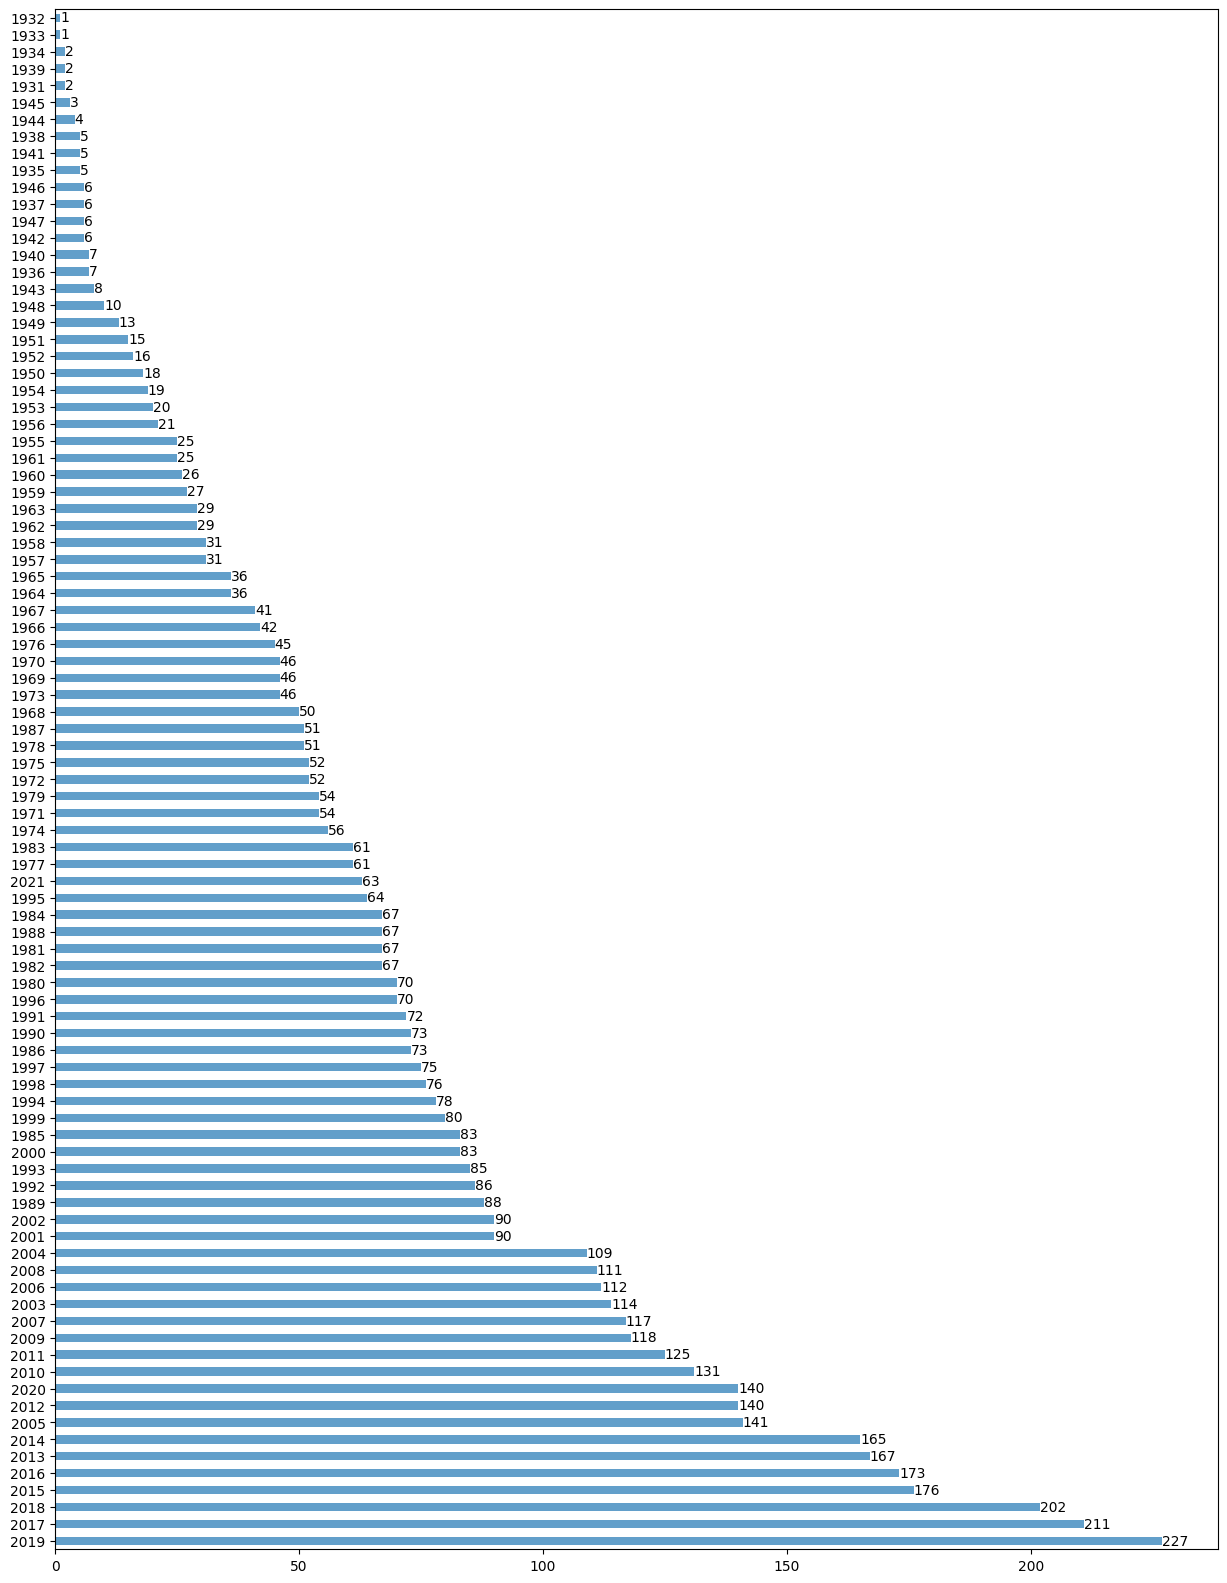

In [23]:
#Visualize user age distribution
ax=data['Year'].value_counts().plot(kind='barh',alpha=0.7,figsize=(15,20))
for i in ax.containers:
  ax.bar_label(i,)
plt.show()

In [24]:
def TopTenPlot(column):
    global data
    data[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


In [25]:
def Histogram(column):
    global data
    plt.figure(figsize=(20,6))
    plt.hist(data[column], edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


In [26]:
def Scatter(x, y, c=None):
    global data
    plt.figure(figsize=(20,6))
    plt.scatter(data[x], data[y], edgecolor="k", c=c)
    plt.xticks(rotation=0)
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


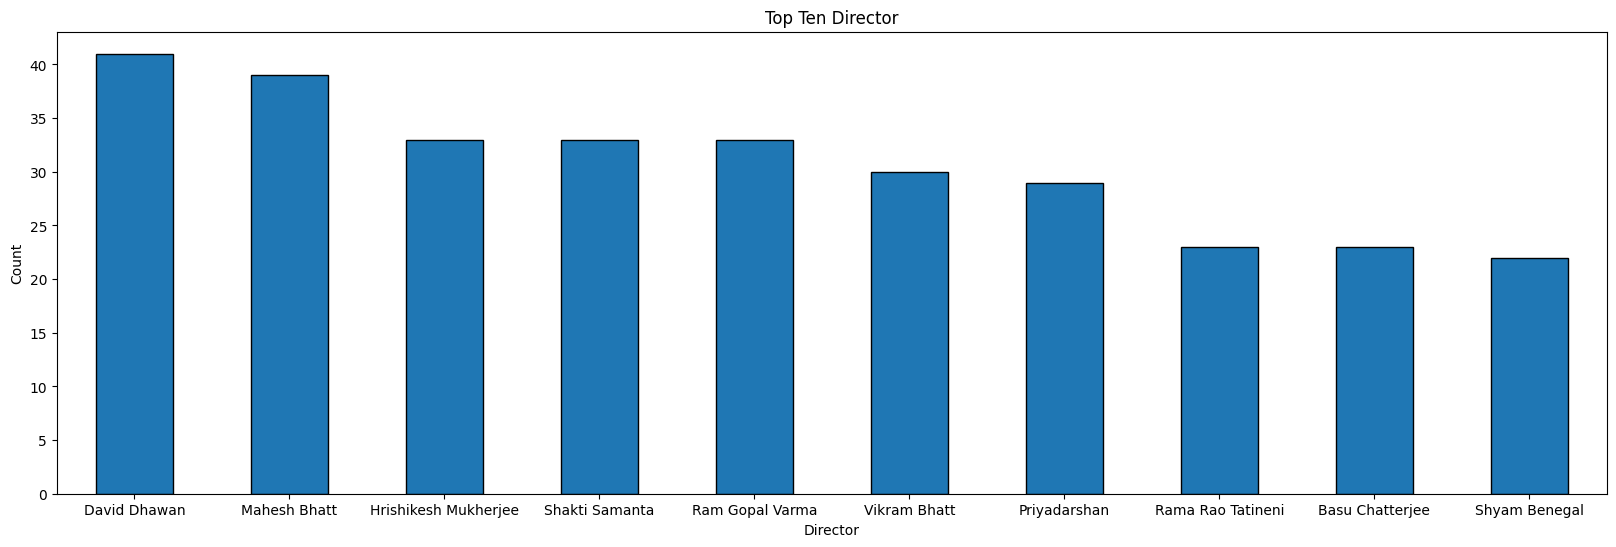

In [27]:
TopTenPlot("Director")

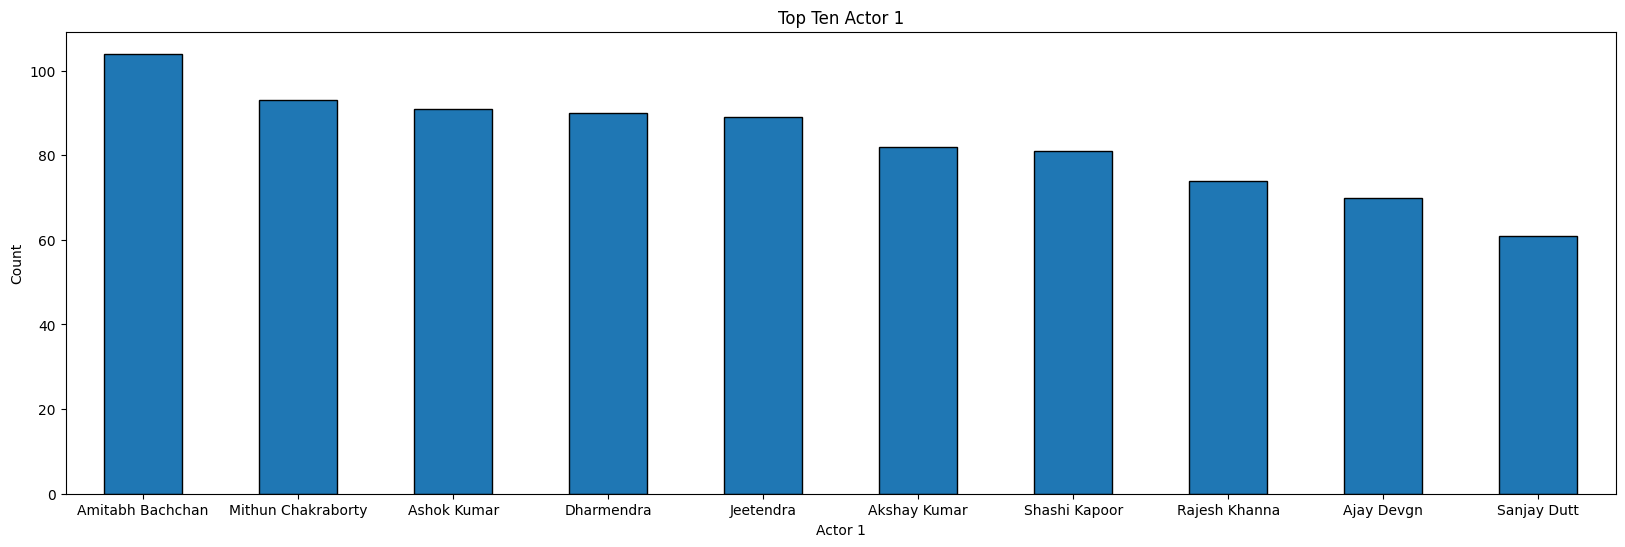

In [28]:
TopTenPlot("Actor 1")

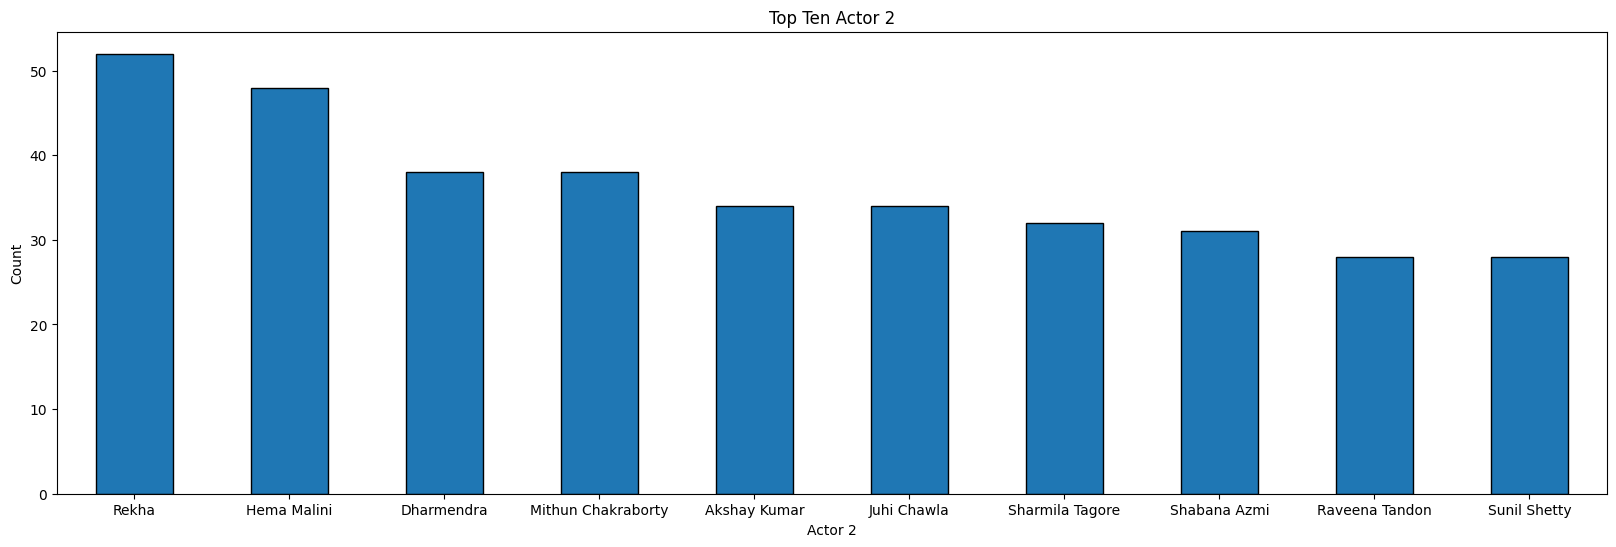

In [29]:
TopTenPlot("Actor 2")

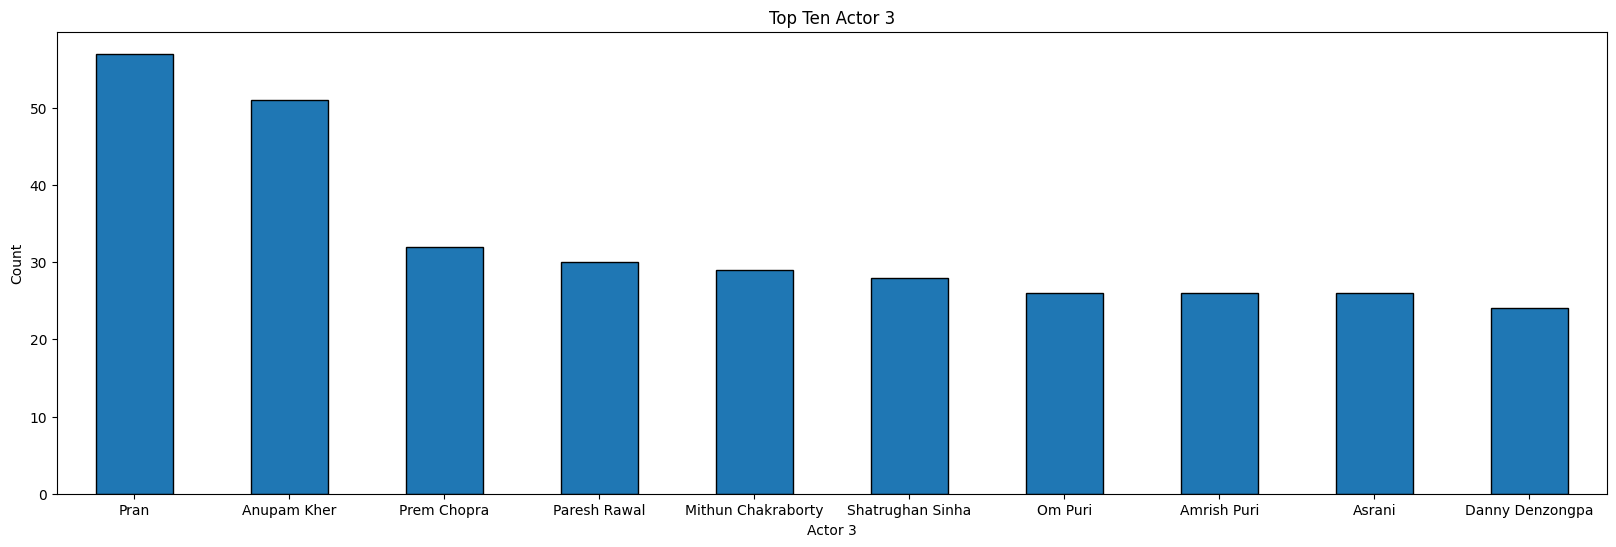

In [30]:
TopTenPlot("Actor 3")

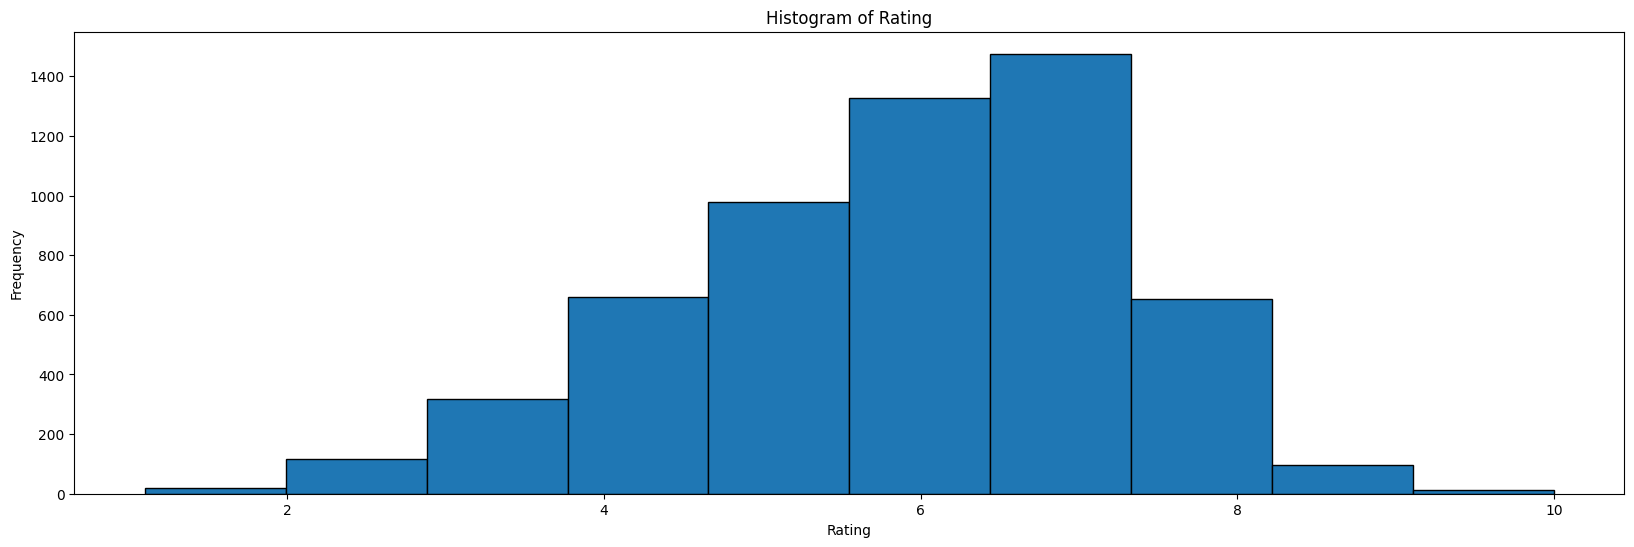

In [31]:
Histogram("Rating")

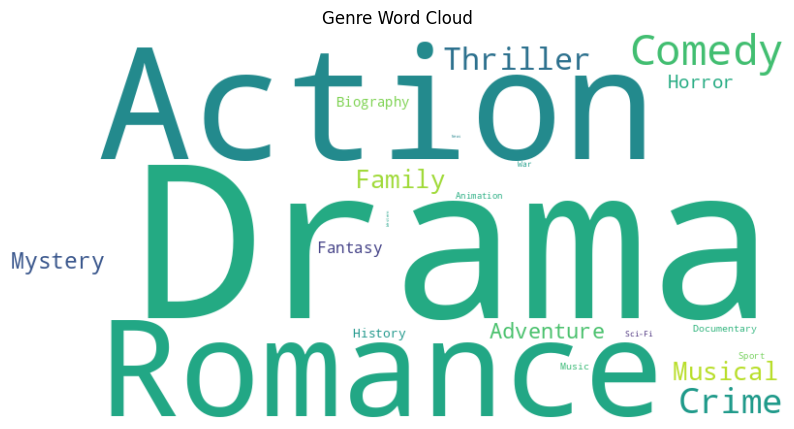

In [32]:
genre_counts = data['Genre'].str.split(', ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

In [33]:
genresPie = data['Genre'].value_counts()
genresPie.head(5)


genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})
genrePie.head(5)

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",328
3,"Action, Drama",206
4,"Comedy, Drama",205


In [34]:
genrePie.loc[genrePie['Count'] < 50, 'Genre'] = 'Other'
ax = px.pie(genrePie, values='Count', names='Genre', title='More than one Genre of movies in Indian Cinema')
ax.show()

### 5. Model Training

In [35]:
Input = data.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)
Output = data['Rating']

In [36]:
Input.head()

,Year,Duration,Votes
1,2019,109,8
3,2019,110,35
5,1997,147,827
6,2005,142,1086
8,2012,82,326


In [37]:
Output.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [38]:
x_train, x_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)

###  6. Accuracy

In [39]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*100))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*100, 2)


In [40]:
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)

GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)

In [41]:
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  LINEAR REGRESSION
Accuracy = -2.85%
Mean Squared Error = 1.36

Model:  RANDOM FOREST
Accuracy = 14.37%
Mean Squared Error = 1.24

Model:  DECEISION TREE
Accuracy = -54.33%
Mean Squared Error = 1.66

Model:  GRADIENT BOOSTING
Accuracy = 27.75%
Mean Squared Error = 1.14

Model:  K NEAREST NEIGHBORS
Accuracy = 9.98%
Mean Squared Error = 1.27



## 7.Conclusion

In [42]:
models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Random Forest", "Decision Tree", "Gradient Boosting", "K Nearest Neighbors"],
        "SCORES": [LRScore, RFScore, DTScore, GBScore, KNNScore]
    }
)
models.sort_values(by='SCORES', ascending=False)


,MODELS,SCORES
3,Gradient Boosting,27.75
1,Random Forest,14.37
4,K Nearest Neighbors,9.98
0,Linear Regression,-2.85
2,Decision Tree,-54.33


###**Insights:**
* #### Among other predictors Gradient Boosting got top score followed by Random Forest Regressor.
* #### Suggested to try more on EDA as it has vast idea to try on categorical data.
* #### Suggested to train on more available algorithms to find most accurate one to predict.

# ***THANK YOU 😀***
# ***Happy a nice day***